## Q. 아래 사항을 참조하여 IMDB 영화평 감성분석을 딥러닝으로 수행하세요.
- 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용\
  from keras.datasets import imdb
- 필요한 특성 개수를 지정 1000\
 number_of_features = 1000\
 (data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)
- IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터를 로드
- IMDB 데이터를 원-핫 인코딩된 특성 행렬로 변환\
  tokenizer = Tokenizer(num_words=number_of_features)\
  features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")\
  features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
- 모델 정의
  16개의 은닉 유닛을 가진 2개의 은닉층(relu), 1개의 출력층(sigmoid)
- 모델 컴파일
- 학습 실행
- 평가
- 에폭별 정확도 시각화 및 적정 에폭 제시

https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).

For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [6]:
# 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용
from keras.datasets import imdb

# 필요한 특성 개수를 지정 1000
number_of_features = 1000

# IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터를 로드
# (data_train, target_train), (data_test, target_test) = imdb.load_data(
#     path="imdb.npz"
#     , num_words=number_of_features
#     , skip_top=0
#     , maxlen=None
#     , seed=113
#     , start_char=1
#     , oov_char=2
#     , index_from=3
# )

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)
# (data_train, target_train), (data_test, target_test)


- Returns:

 - 2 tuples:
  - x_train, x_test: list of sequences, which are lists of indexes (integers). If the num_words argument was specific, the maximum possible index value is num_words-1. If the maxlen argument was specified, the largest possible sequence length is maxlen.
  - y_train, y_test: list of integer labels (1 or 0).

- Arguments:

 - path: if you do not have the data locally (at '~/.keras/datasets/' + path), it will be downloaded to this location.
 - num_words: integer or None. Top most frequent words to consider. Any less frequent word will appear as oov_char value in the sequence data.
 - skip_top: integer. Top most frequent words to ignore (they will appear as oov_char value in the sequence data).
 - maxlen: int. Maximum sequence length. Any longer sequence will be truncated.
 - seed: int. Seed for reproducible data shuffling.
 - start_char: int. The start of a sequence will be marked with this character. Set to 1 because 0 is usually the padding character.
 - oov_char: int. words that were cut out because of the num_words or skip_top limit will be replaced with this character.
 - index_from: int. Index actual words with this index and higher.

In [10]:
# IMDB 데이터를 원-핫 인코딩된 특성 행렬로 변환

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

keras tokenizer

https://keras.io/preprocessing/text/

keras.preprocessing.text.Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

Text tokenization utility class.

This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

- Arguments

 - num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.
 - filters: a string where each element is a character that will be filtered from the texts. The default is all punctuation, plus tabs and line breaks, minus the ' character.
 - lower: boolean. Whether to convert the texts to lowercase.
 - split: str. Separator for word splitting.
 - char_level: if True, every character will be treated as a token.
 - oov_token: if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls

By default, all punctuation is removed, turning the texts into space-separated sequences of words (words maybe include the ' character). These sequences are then split into lists of tokens. They will then be indexed or vectorized.

0 is a reserved index that won't be assigned to any word.

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 16)                16016     
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 17        
Total params: 16,577
Trainable params: 16,577
Non-trainable params: 0
_________________________________________________

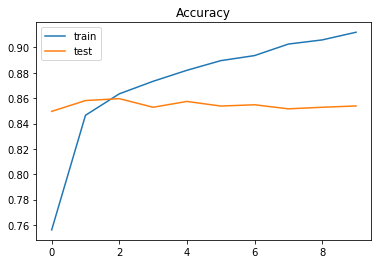

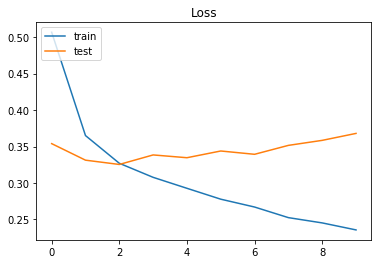

In [33]:
import sklearn.metrics as metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import h5py
import warnings
warnings.filterwarnings('ignore')

# 모델 정의 16개의 은닉 유닛을 가진 2개의 은닉층(relu), 1개의 출력층(sigmoid)

model = Sequential()
# Input - Layer
model.add(Dense(16, activation='relu', input_shape=(1000, )))
# Hidden - Layers
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(16, activation = "relu"))
# Output- Layer
model.add(Dense(1, activation = "sigmoid"))
model.summary()


# 모델 컴파일하기
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])


# 학습 실행하기 
hist = model.fit(features_train, target_train
                 , batch_size=128
                 , epochs=10
                 , verbose=1
                 , validation_data=(features_test, target_test))


# 평가하기 
score = model.evaluate(features_test, target_test, verbose=1)
print("accuracy=", score[1], 'loss=', score[0])

# 가중치데이터 저장하기 
model.save_weights('./dataset/genre-model.hdf5')

# 에폭별 정확도 시각화 및 적정 에폭 제시
# plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
#plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist.history['val_accuracy'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()